In [80]:
import torch
from torch import nn
import matplotlib.pyplot as plt


torch.__version__


'2.1.0+cu121'

In [81]:
# Data preparation and loading

In [82]:
weight = 0.7
bias = 0.3
start =0
end =1
step =0.02
X = torch.arange(start,end,step).unsqueeze(dim=1) #unsqueezing added extra dimension for matrix format multiplication with W
Y= weight *X + bias
X[:10], Y[:10],len(X),len(Y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [83]:
X.shape, Y.shape

(torch.Size([50, 1]), torch.Size([50, 1]))

In [84]:
### splitiing data into training and testing set

In [85]:
train_split= int(0.8*len(X))
X_train, Y_train =X[:train_split], Y[:train_split]
X_test, Y_test = X[train_split:], Y[train_split:]


In [86]:
len(X_train), len(Y_train), len(X_test), len(Y_test)

(40, 40, 10, 10)

In [87]:
X_train, Y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

In [88]:
def plot_predictions(train_data=X_train,
                     train_labels=Y_train,
                     test_data=X_test,
                     test_labels=Y_test,
                     predictions=None):
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 7))

    # plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # plot test data in green
    plt.scatter(test_data, test_labels, c="g", label="Testing data")

    # are there predictions?
    if predictions is not None:
        # plot the predictions if they exist
        predictions_np = predictions.detach().numpy()  # Detach before converting to NumPy
        plt.scatter(test_data, predictions_np, c="r", s=4, label="Predictions")

    plt.legend(prop={"size": 14})
    plt.show()



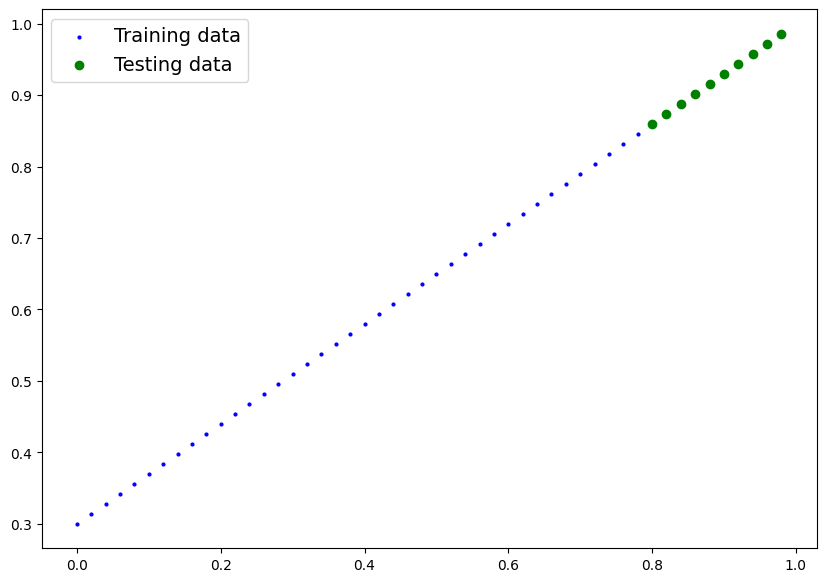

In [89]:
plot_predictions();

# Building the Model

In [90]:
#create a linear regression model class
from torch import nn
class LinearRegressionModel(nn.Module): # almost everything in PyTorch inherits from nn.module
  def __init__(self):
    super().__init__()

    #initialize model parameters
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True,dtype=torch.float))
    self.bias=nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

  #Forward  method to define the computation in the model
  def forward(self, x:torch.tensor) -> torch.tensor : #"x" is the input data
    return self.weights* x + self.bias #linear regression formula



Pytorch Model building essentials


*torch.nn : contains all of the buildings for computational graphs/neural nw

*torch.nn.Parameter : what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us

*torch.nn.Module : The ase class for all neural network modules, if you subclass it, you should overwrite forward()

*torch.optime : this where the optimizers in PyTorch live, they will help with gradient descents

*def forwad(): all nn.Module subclasses require to overwrite forward().
   this method will determine what happens in forward method.


In [91]:
### checking the contents of our PyTorch model


In [92]:
#Create a random seed
torch.manual_seed(42)

#Create an instance of the model(this is a subclass of nn.Module)
model_0 = LinearRegressionModel()
print(model_0)
print(model_0.parameters())
list(model_0.parameters())

LinearRegressionModel()
<generator object Module.parameters at 0x790ef08176f0>


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [93]:
#list named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [94]:
### making predictions using torch.inference_mode()
with torch.inference_mode():

  Y_preds = model_0(X_test)

Y_preds
#inference mode disables the gradient\
# we can also use with torch.no_grad():

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [95]:
#prediction w/o inference_mode()
Y_preds = model_0(X_test)
Y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [96]:
Y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

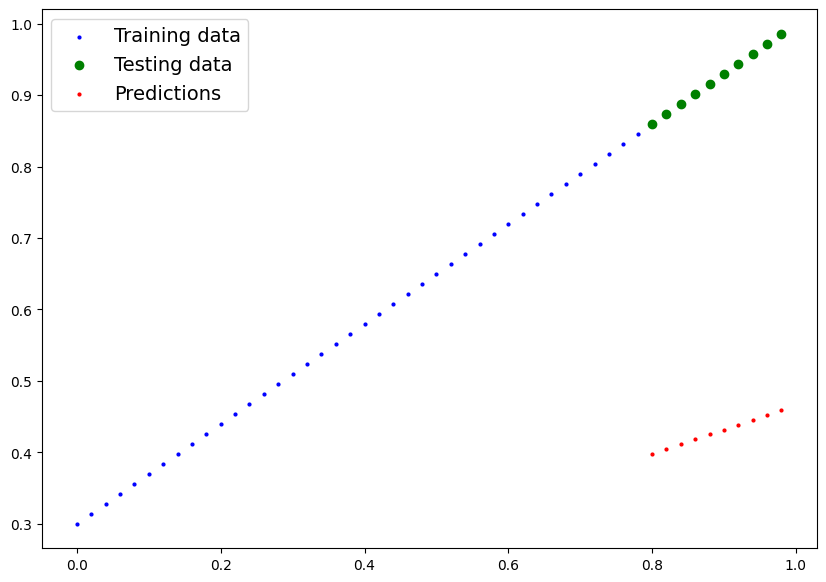

In [97]:
plot_predictions(predictions= Y_preds)

In [98]:
#set up loss function
loss_fn= nn.L1Loss()
#set up an optimizer
optimizer = torch.optim.SGD(params= model_0.parameters(), lr= 0.01 )

In [99]:
# Builing a training & testing loop in Pytorch

0.loop through the data

1.forward pass (this involves data moving through our models forward fucntions)

2.calculate the loss (compare forward path predictions to the ground truth labels)

3. Optimize zero grad

4. loss backward

5. optimizer step use the optimizer to adjust models paramaters to try and improve the loss


In [100]:
# an epoch is one loop through the data...(this is hyperparamater because we set it ourselves)
epochs = 1


#0. loop through the data
for epoch in range(epochs):

   #set the model to training mode
   model_0.train()  #train mode in PyTorch sets all parameters that requires gradients to require gradient

   #1.forward pass
   Y_pred = model_0(X_train)

   #2. calculate loss
   loss= loss_fn(Y_pred, Y_train)
   print(f"loss : {loss}")

   #3. optimizer zero grad
   optimizer.zero_grad()

   #4.perform backprop on loss wrt parameters of the model
   loss.backward()

   #5. Step the optimizer(perform gradient descent)
   optimizer.step()

   #Testing
   model_0.eval()  #turns off gradient tracking
   print(model_0.state_dict())

   ###Testing
   model_0.eval()  #turns off different settings in model not needed for evaluation
   with torch.inference_mode():  #turns off gradient tracking & couple of more thngs behind scenes
    #1.Do the forward pass
    test_pred = model_0(X_test)

    #2. Calculate the loss
    test_loss= loss_fn(test_pred, Y_test)


  #print out whats happening
   print(f"Epoch: {epoch}| Loss: {loss} | Test loss: {test_loss}")






loss : 0.31288138031959534
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 0| Loss: 0.31288138031959534 | Test loss: 0.48106518387794495


In [101]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])

In [102]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])

In [103]:
weight,bias

(0.7, 0.3)

In [104]:
with torch.inference_mode():
  Y_preds_new = model_0(X_test)


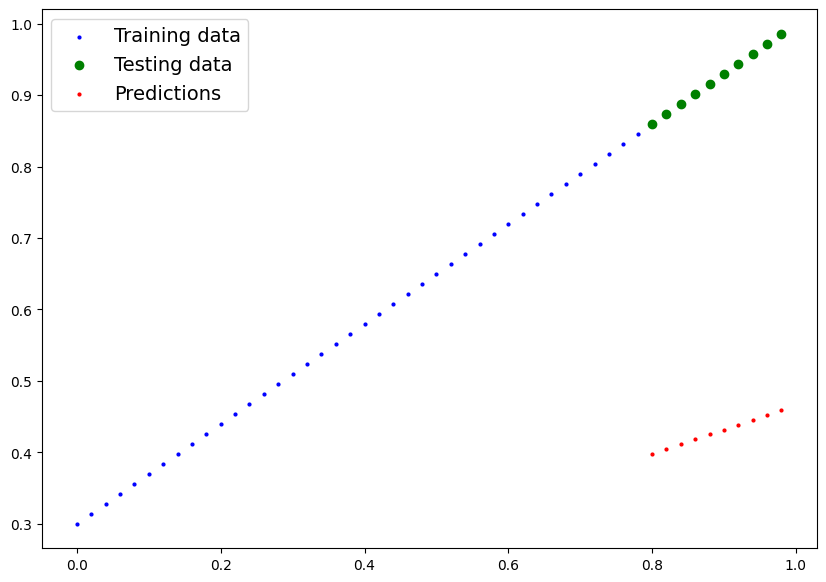

In [105]:
plot_predictions(predictions=Y_preds);

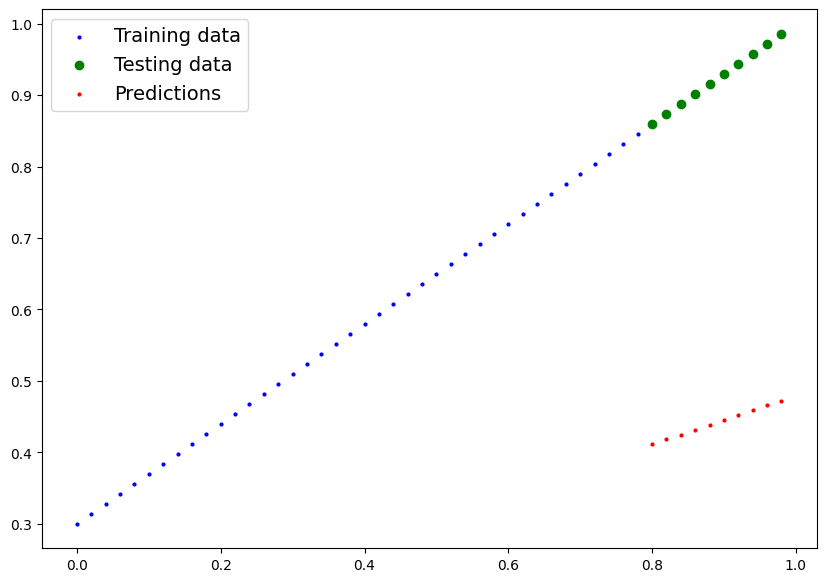

In [106]:
plot_predictions(predictions=Y_preds_new);

In [107]:
#So we moved the predictions closer.

#now lets see the result with number of epochs

In [108]:
torch.manual_seed(42)
# an epoch is one loop through the data...(this is hyperparamater because we set it ourselves)
epochs =200

#track different values
epoch_count=[]
loss_values =[]
test_loss_values=[]


#0. loop through the data
for epoch in range(epochs):

   #set the model to training mode
   model_0.train()  #train mode in PyTorch sets all parameters that requires gradients to require gradient

   #1.forward pass
   Y_pred = model_0(X_train)

   #2. calculate loss
   loss= loss_fn(Y_pred, Y_train)
   print(f"loss : {loss}")

   #3. optimizer zero grad
   optimizer.zero_grad()

   #4.perform backprop on loss wrt parameters of the model
   loss.backward()

   #5. Step the optimizer(perform gradient descent)
   optimizer.step()

   #Testing
   model_0.eval()  #turns off gradient tracking
   print(model_0.state_dict())

   ###Testing
   model_0.eval()  #turns off different settings in model not needed for evaluation
   with torch.inference_mode():  #turns off gradient tracking & couple of more thngs behind scenes
    #1.Do the forward pass
    test_pred = model_0(X_test)

    #2. Calculate the loss
    test_loss= loss_fn(test_pred, Y_test)


  #print out whats happening

   if epoch%10 ==0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)

    print(f"Epoch: {epoch}| Loss: {loss} | Test loss: {test_loss}")
    print(model_0.state_dict())








loss : 0.3013603389263153
OrderedDict([('weights', tensor([0.3445])), ('bias', tensor([0.1488]))])
Epoch: 0| Loss: 0.3013603389263153 | Test loss: 0.4675942063331604
OrderedDict([('weights', tensor([0.3445])), ('bias', tensor([0.1488]))])
loss : 0.28983935713768005
OrderedDict([('weights', tensor([0.3484])), ('bias', tensor([0.1588]))])
loss : 0.2783183455467224
OrderedDict([('weights', tensor([0.3523])), ('bias', tensor([0.1688]))])
loss : 0.26679736375808716
OrderedDict([('weights', tensor([0.3562])), ('bias', tensor([0.1788]))])
loss : 0.2552763521671295
OrderedDict([('weights', tensor([0.3601])), ('bias', tensor([0.1888]))])
loss : 0.24375534057617188
OrderedDict([('weights', tensor([0.3640])), ('bias', tensor([0.1988]))])
loss : 0.23223432898521423
OrderedDict([('weights', tensor([0.3679])), ('bias', tensor([0.2088]))])
loss : 0.22071333229541779
OrderedDict([('weights', tensor([0.3718])), ('bias', tensor([0.2188]))])
loss : 0.20919232070446014
OrderedDict([('weights', tensor([0.3

In [111]:
with torch.inference_mode():
  Y_preds_new= model_0(X_test)

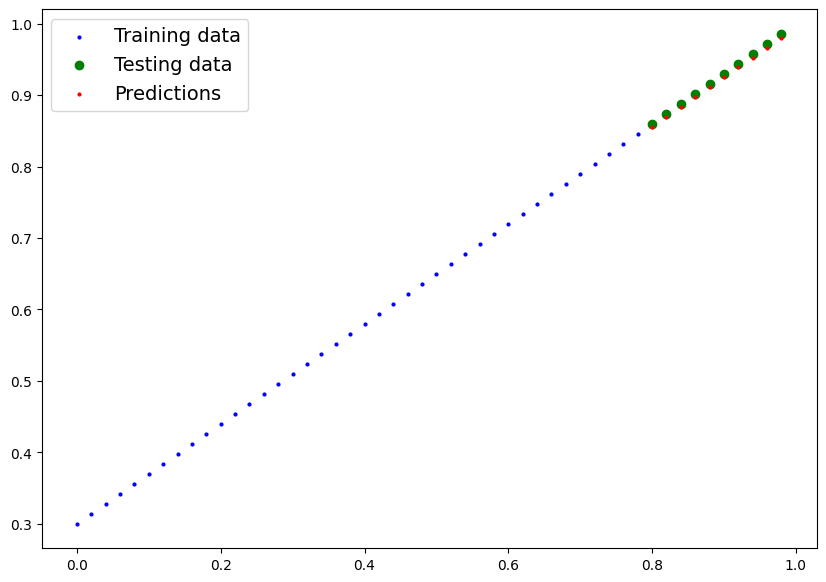

In [112]:
plot_predictions(predictions=Y_preds_new);

In [113]:
#Now predictions are very close to the correct linear relation

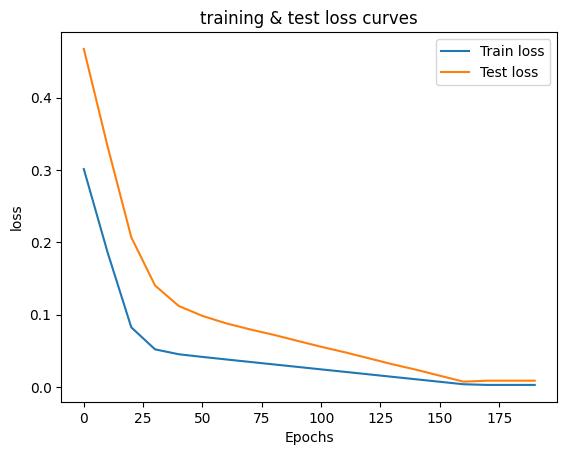

In [114]:
import numpy as np

#plot loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label ='Train loss')
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).numpy()), label='Test loss')
plt.title("training & test loss curves")
plt.ylabel("loss")
plt.xlabel('Epochs')
plt.legend();


In [ ]:
#saving the model in the pytorch